# Chapter2_데이터 다루기
## 2-1. 훈련세트와 테스트세트
>지도 학습 / 비지도 학습 <br>
>모델을 훈련시키는 훈련 세트 <br>
>모델을 평가하기 위한 테스트 세트 <br>

* 1장 K-최근접 이웃 알고리즘의 한계 : <br>
  K-최근접 이웃 알고리즘은 분류에 따른 알고리즘 <br>
    즉, 비슷한 특성을 가진 데이터는 비슷한 범주에 속하는 경향이 있다는 가정 하에 사용 <br>
    예를 들어 1장의 예제에서 빙어,도미 외의 생선 종류가 1개가 추가되었을 때, 새로 추가된 생선이 도미와 크기/무게가 근접하다고 하면 다른 종류의 생선이어도 도미로만 출력됨 <br>
    분류하고자 하는 데이터가 많아질 경우, 분류를 위한 데이터를 입력해야 하며 적절한 데이터의 선택이 중요함 (적절한 K 선택의 중요성) <br>

머신러닝 알고리즘의 분류
1. 지도 학습 (Supervised learning) : 훈련을 위한 [데이터 - 입력(input)]와 [정답 - 타깃(target)]이 필요함 <br>
    > 훈련 데이터(training data) = 입력 + 타깃<br>
    > 특성(feature) = 1장 예제에 사용된 길이,무게 <br>
    > 입력(input) = 길이,무게 <br>
    > 타깃(target) = 정답(1,0~) <br>
    > 정답이 있기 때문에 알고리즘이 정답을 맞히는 것을 학습함 (A? or B?) <br>


2. 비지도 학습 (Unsupervised learning) : 정답(target) 없이 "입력(input)" 데이터만 사용
    > 데이터를 잘 파악하거나 변형하는데 도움을 줌 (6장에서 배움)

훈련 세트와 테스트 세트
1. 훈련 세트 : 훈련에 사용되는 데이터
 > 테스트 세트를 제외한 모든 데이터를 사용
2. 테스트 세트 : 평가에 사용되는 데이터
 > 전체 데이터에서 20~30%를 테스트 데이터로 사용하기도 함

> 머신러닝을 평가하기 위해서는 테스트 세트와 훈련 세트가 따로 준비되어야 한다. <br>
> 훈련에 사용한 데이터를 다시 평가에 사용한다면 무슨 의미가 있겠나...

In [8]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

# 하나의 생선 데이터 = 하나의 샘플(sample)
# 특성(feature)은 length, weight 2개
# 처음 35개의 샘플은 훈련 세트로 사용
# 나머지 14개의 샘플은 테스트 세트로 사용


from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

#처음부터 35개까지 선택을 위한 index 지정
print(fish_data[4])

# 배열의 index는 0부터 시작

[29.0, 430.0]


In [9]:
# python list 슬라이싱(slicing)

print(fish_data[0:5]) # 0 ~ 4

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [10]:
# 0 생략 가능
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [11]:
# 마지막 생략 가능
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [14]:
# 훈련 세트, 입력값 중 0부터 34번째 index까지 사용 (35개)
train_input = fish_data[:35]

# 훈련세트, 타깃값 중 0부터 34번째 index까지 사용 (35개)
train_target = fish_target[:35]


# 테스트 세트, 입력값 중 35번째부터 마지막 인덱스까지 사용 (14개)
test_input = fish_data[35:]

# 테스트 세트, 입력값 중 35번째부터 마지막 인덱스까지 사용 (14개)
test_target = fish_target[35:]


# 훈련 세트, fit() 모델 훈련
kn = kn.fit(train_input, train_target)

# 테스트 세트 score() 평가
kn.score(test_input, test_target) # 0.0 => 정확도가 0..

0.0

정확도가 0.0 ?
 > 이유 : 도미를 훈련 세트로, 빙어를 테스트 세트로 나누었기 때문... 빙어는 모델 훈련을 하지 않았다.

개선 ? <br>
 > 도미와 빙어가 적절하게 섞여야지... <br>
 > 앞에 35개는 도미, 뒤에 14개는 빙어였으니... 잘못된 것

이런 것을 '샘플링 편향(Sampling Bias)'라고 부름

#### 넘파이(numpy)에 대해 알아보자
> Python의 대표적인 배열(array) 라이브러리 - 고차원 배열 도구

> seed() : 난수를 생성하기 위한 정수 초깃값을 지정, 초깃값이 같으면 동일한 난수를 뽑을 수 있음, 랜덤 함수의 결과를 동일하게 재현하고자 할 때 사용 

> arange() : 일정한 간격의 정수 또는 실수 배열을 만듦, 기본 간격은 1 <br>
        > 매개변수가 하나이면 종료 숫자를 의미 ex) print(np.arange(3)) : [0, 1, 2]<br>
        > 매개변수가 2개이면 시작, 종료 의미 ex) print(np.arange(1, 3)) : [1, 2]<br>
        > 매개변수가 3개이면 마지막 변수는 간격 ex) print(np.arange(1, 3, 0.2)) : [1. , 1.2, ... 2.6, 2.8]<br>

> shuffle()은 주어진 배열을 랜덤하게 섞기, 다차원 배열일 경우 첫 번째 축(행)에 대해서만 섞음

In [18]:
# fish_data, target numpy로 만듦
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [19]:
# 배열의 크기를 알려주는 shape

print(input_arr.shape)
# 49개의 sample, 2개의 feature

(49, 2)


In [36]:
# input_arr과 target_arr 의 같은 위치는 같이 선택되게 하여 무작위로 샘플링

# numpy arange() 사용하여 index를 만들고 랜덤하게 섞자

#np.random.seed() # 숫자 지정 안하면 계속 값이 바뀜
np.random.seed(42) # 일정한 결과를 얻기 위해 초기 랜덤 seed를 지정 # 42로 지정한 이유는 딱히 없는 듯..
index = np.arange(49) # index 0 ~ 48 생성
np.random.shuffle(index) # 섞기

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [41]:
# 배열 인덱싱 (array indexing)
# 1개의 인덱스가 아닌, 여러 개의 인덱스로 한번에 여러 원소를 선택할 수 있음

print(input_arr[[1,3]])
print(input_arr[[1,7,10]])

print(input_arr[[13]])

[[ 26.3 290. ]
 [ 29.  363. ]]
[[ 26.3 290. ]
 [ 30.  390. ]
 [ 31.  475. ]]
[[ 32. 340.]]


In [42]:
# numpy 배열을 index로 전달

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0])
# index가 생성되었을 때, 첫번째 값은 13
# train_input의 첫번째 원소는 input_arr의 14번째 원소가 들어가 있음
# input_arr[13]은 input_arr의 14번째 원소 (위치 13)
# index 생성 시, 첫번째 index 값은 13

[ 32. 340.] [ 32. 340.]


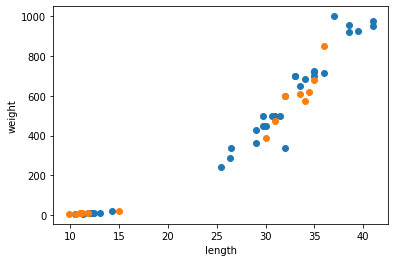

In [62]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

# print(train_input[:]) # 전체 배열 출력
# print(train_input[:,0]) # 전체 배열 중 첫번째 원소
# print(train_input[:,1]) # 전체 배열 중 두번째 원소

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) # 행과 열을 ','로 구분, 생략 시 모두 선택
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
# 파란색 = train
# 주황색 = test


In [63]:
kn = kn.fit(train_input, train_target)

kn.score(test_input, test_target)

1.0

In [64]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [65]:
test_target # 코랩의 마지막 셀은 print 사용하지 않아도 자동 출력

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])